# Airbnb Ratings Prediction

#### 각 방의 정보들을 가지고 그 방의 평점을 예측해주세요.
#### 최종적으로 r2_score를 0.999 이상으로 예측하면 성공입니다!

#### Target variable: review_scores_rating
#### Independent variables: else

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('/content/drive/My Drive/YBIGTA/DA 교육세션/2020-09-26 ML  Regression/airbnb_preprocessed.csv')

### 자유롭게 FE 해주세요

In [5]:
df.shape

(37927, 75)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37927 entries, 0 to 37926
Data columns (total 75 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       37927 non-null  int64  
 1   Unnamed: 0.1                                     37927 non-null  int64  
 2   id                                               37927 non-null  int64  
 3   name                                             37920 non-null  object 
 4   summary                                          36389 non-null  object 
 5   description                                      37357 non-null  object 
 6   host_listings_count                              37927 non-null  float64
 7   host_total_listings_count                        37927 non-null  float64
 8   host_verifications                               37927 non-null  object 
 9   latitude                    

In [7]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,name,summary,description,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,is_location_exact_f,is_location_exact_t,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,property_type_Townhouse,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,has_availability_t,requires_license_f,instant_bookable_f,instant_bookable_t,is_business_travel_ready_f,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,0,1,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","Beautiful, spacious skylit studio in the heart...",6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",40.75362,-73.98377,2,1.0,0.0,1.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225.0,1,0.0,7,1125,4,34,64,339,48,5,94.0,2,2,0,0,0.38,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1
1,1,3,5099,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,My large 1 bedroom apartment has a true New Yo...,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",40.74767,-73.97500,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200.0,2,100.0,3,21,0,0,0,0,78,8,90.0,1,1,0,0,0.59,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1,0,1
2,2,4,5114,Super Room in Great area.,NaN,"First, the area is PERFECT if you want to visi...",3.0,3.0,"['email', 'phone', 'reviews']",40.71910,-73.99040,2,1.0,1.0,1.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",94.0,1,13.0,1,730,30,60,90,109,75,0,94.0,3,1,2,0,0.56,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0
3,3,5,5121,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",40.68688,-73.95596,2,1.0,1.0,1.0,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",60.0,1,30.0,29,730,30,60,90,365,50,1,90.0,1,0,1,0,0.38,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0
4,4,6,5178,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,Please don’t expect the luxury here just a bas...,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",40.76489,-73.98493,2,1.0,1.0,1.0,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",79.0,1,12.0,2,14,18,21,27,207,470,54,84.0,1,0,1,0,3.56,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0


In [8]:
df.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

In [9]:
df.drop(["id"],axis=1,inplace=True)

In [10]:
#object인 컬럼들 우선 삭제...
df.drop(list(df.columns[df.dtypes=="object"]),axis=1,inplace=True)

In [11]:
# _t _f 로 끝나는 column들 중에서는 _t만 남김
df.drop(list(df.columns[df.columns.str.contains('.*_f', regex=True)]),axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37927 entries, 0 to 37926
Data columns (total 57 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   host_listings_count                              37927 non-null  float64
 1   host_total_listings_count                        37927 non-null  float64
 2   latitude                                         37927 non-null  float64
 3   longitude                                        37927 non-null  float64
 4   accommodates                                     37927 non-null  int64  
 5   bathrooms                                        37927 non-null  float64
 6   bedrooms                                         37927 non-null  float64
 7   beds                                             37927 non-null  float64
 8   price                                            37927 non-null  float64
 9   guests_included             

In [13]:
dfX = df.drop("review_scores_rating",axis=1)
dfY = df["review_scores_rating"]

### 변수들의 다중공선성을 체크해주세요. 결과에 따라 적절히 변수를 처리해주세요.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [16]:
vif.sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
0,inf,host_listings_count
37,inf,property_type_Townhouse
29,inf,neighbourhood_group_cleansed_Manhattan
30,inf,neighbourhood_group_cleansed_Queens
33,inf,property_type_Apartment
34,inf,property_type_Condominium
35,inf,property_type_House
36,inf,property_type_Loft
38,inf,room_type_Entire home/apt
1,inf,host_total_listings_count


In [17]:
#높은거부터 하나씩 없애봄
from statsmodels.stats.outliers_influence import variance_inflation_factor
dfX_temp = dfX.drop(["host_listings_count","neighbourhood_group_cleansed_Brooklyn","property_type_House","bed_type_Airbed","room_type_Private room",
                     "has_availability_t","latitude","calculated_host_listings_count","longitude","host_has_profile_pic_t","availability_60","bed_type_Real Bed","availability_90","accommodates"],axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX_temp.values, i) for i in range(dfX_temp.shape[1])]
vif["features"] = dfX_temp.columns
vif.sort_values(by="VIF Factor",ascending=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
1,9.502450,bathrooms
12,7.657709,number_of_reviews_ltm
24,7.223357,property_type_Apartment
2,7.206277,bedrooms
16,6.612454,reviews_per_month
3,6.261256,beds
23,5.331809,is_location_exact_t
5,4.496923,guests_included
37,3.469067,cancellation_policy_strict_14_with_grace_period
11,3.440727,number_of_reviews


In [18]:
final_X = dfX_temp.copy()
final_Y = dfY.copy()

In [19]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    final_X.values, i) for i in range(final_X.shape[1])]
vif["features"] = final_X.columns
vif.sort_values(by="VIF Factor",ascending=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
1,9.502450,bathrooms
12,7.657709,number_of_reviews_ltm
24,7.223357,property_type_Apartment
2,7.206277,bedrooms
16,6.612454,reviews_per_month
3,6.261256,beds
23,5.331809,is_location_exact_t
5,4.496923,guests_included
37,3.469067,cancellation_policy_strict_14_with_grace_period
11,3.440727,number_of_reviews


### train/test set을 나눠 선택하신 모델을 돌리고, r2 score로 평가해주세요.

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_X, final_Y, test_size = 0.30, random_state = 123)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(26548, 42)
(26548,)
(11379, 42)
(11379,)


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [58]:
y_train = y_train.round()
y_test = y_test.round()

In [59]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [61]:
model = LGBMRegressor()
model.fit(x_train_scaled, y_train)
result = model.fit(x_train_scaled, y_train)
pred = model.predict(x_test_scaled)
score = r2_score(y_test,pred)
score

0.10528017852553517

### 잔차의 정규성을 확인해주세요. 해당 모델이 유의한 모델이라고 할 수 있나요?

In [62]:
residual = y_test - pred

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


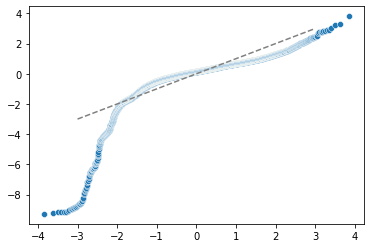

In [66]:
import scipy.stats
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

In [67]:
scipy.stats.shapiro(residual)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.7325425744056702, 0.0)

In [70]:
scipy.stats.kstest(residual,"norm")

KstestResult(statistic=0.4149995009602315, pvalue=0.0)

###### LinearRegression, Ridge, Lasso, ElasticNet, RandomForestRegressor, XGBRegressor보다는 qq plot에서 나은 분포를 보이긴 하지만 Shapiro-Wilk test와 Kolmogorov-Smirnov test에서 귀무가설이 기각되어 정규분포를 따르지 않는 것으로 보임(표본의 개수가 2000개 이상이면 Kolmogorov-Smirnov test를, 2000개 이하이면 Shapiro-Wilk test를 사용한다고 합니다.)

### 변수의 영향력을 확인해주세요. (model.feature_importances_  또는   model.coef_   등등)
### 어떤 변수의 영향력이 큰가요? 이 변수들은 인과성 가정을 만족하나요?

In [94]:
feature_importances_df = pd.DataFrame(data={"feature": list(x_train.columns), "importance" : list(model.feature_importances_)})
feature_importances_df.sort_values(by="importance",ascending=False)

,feature,importance
16,reviews_per_month,390
11,number_of_reviews,356
4,price,339
10,availability_365,227
0,host_total_listings_count,198
8,maximum_nights,171
7,minimum_nights,145
6,extra_people,131
9,availability_30,113
3,beds,96


한달에 올라오는 리뷰 수, 총 리뷰 수, 가격 등이 중요한 변수로 나옴. 리뷰가 많은 숙소일수록 인기가 많다는 지표이며 가격은 평점과 많은 관련이 있으므로 인과성 가정을 만족한다고 볼 수 있음. 

### 수고하셨습니다. 즐거운 한가위 보내세요!